### Guided Practices

Code to run during class sessions. This is included in the readme as well.

In [14]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics
import math

df = pd.DataFrame({'x': range(100), 'y': range(100)})
biased_df  = df.copy()
biased_df.loc[:20, 'x'] = 1
biased_df.loc[:20, 'y'] = 1

def append_jitter(series):
    jitter = np.random.random_sample(size=100)
    return series + jitter

df['x'] = append_jitter(df.x)
df['y'] = append_jitter(df.y)

biased_df['x'] = append_jitter(biased_df.x)
biased_df['y'] = append_jitter(biased_df.y)

## fit
lm = linear_model.LinearRegression().fit(df[['x']], df['y'])
print(metrics.mean_squared_error(df['y'], lm.predict(df[['x']])))

## biased fit
lm = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
print(metrics.mean_squared_error(df['y'], lm.predict(df[['x']])))

0.169228213075
0.191370407484


In [24]:
from sklearn import cross_validation
wd = '../../assets/dataset/'
bikeshare = pd.read_csv(wd + 'bikeshare.csv')
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual
kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)
scores = []
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[train_index], lm.predict(modeldata.iloc[train_index])))

print(np.mean(scores))

# this score will be lower, but we're trading off bias error for generalized error
lm = linear_model.LinearRegression().fit(modeldata, y)
print(metrics.mean_squared_error(y, lm.predict(modeldata)))

1672.50758849
1672.58110765


In [18]:
train_index

array([    3,     4,     5, ..., 17376, 17377, 17378])

In [19]:
test_index

array([    0,     1,     2, ..., 17364, 17368, 17369])

In [23]:

for i in range(2, 51, 2):
    kf = cross_validation.KFold(len(modeldata), n_folds=i)
    scores = []
    for train_index, test_index in kf:
        lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
        scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    print(np.mean(scores))
    


1856.09562181
1742.21496325
1762.15716018
1742.80486598
1743.91733572
1730.10025245
1717.41983777
1718.91682842
1713.17906482
1712.25766779
1711.19153497
1705.82573513
1705.91243242
1701.68158412
1704.7671545
1700.56076113
1698.99574904
1696.57330575
1695.77715767
1697.59225511
1696.63702912
1694.79045566
1693.87478207
1693.88438833
1694.17658893


In [8]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print(metrics.mean_squared_error(y, lm.predict(modeldata)))
lm = linear_model.Lasso().fit(modeldata, y)
print(metrics.mean_squared_error(y, lm.predict(modeldata)))
lm = linear_model.Ridge().fit(modeldata, y)
print(metrics.mean_squared_error(y, lm.predict(modeldata)))

1672.58110765
1725.41581608
1672.60490113


In [9]:
alphas = np.logspace(-10, 10, 21)
print(alphas)
for a in alphas:
    print(format(a,'.65f'))
for a in alphas:
    print('Alpha:', a)
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    print(lm.coef_)
    print(metrics.mean_squared_error(y, lm.predict(modeldata)))

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01   1.00000000e+00   1.00000000e+01
   1.00000000e+02   1.00000000e+03   1.00000000e+04   1.00000000e+05
   1.00000000e+06   1.00000000e+07   1.00000000e+08   1.00000000e+09
   1.00000000e+10]
0.00000000010000000000000000364321973154977415791655470655996396090
0.00000000100000000000000006228159145777985641889706869278597878292
0.00000001000000000000000020922560830128472675326634089287836104631
0.00000009999999999999999547481118258862586856139387236908078193665
0.00000099999999999999995474811182588625868561393872369080781936646
0.00001000000000000000081803053914031309545862313825637102127075195
0.00010000000000000000479217360238592959831294137984514236450195312
0.00100000000000000002081668171172168513294309377670288085937500000
0.01000000000000000020816681711721685132943093776702880859375000000
0.1000000000000000055511

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
alphas = np.logspace(-10, 10, 21)
results=[]
for a in alphas:
    print('Alpha:', a)
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    print(lm.coef_)
    print(metrics.mean_squared_error(y, lm.predict(modeldata)))
    results.append(metrics.mean_squared_error(y, lm.predict(modeldata)))
    

Alpha: 1e-10
[ 112.68901765  -84.01121684  -24.68489063  -21.00314493  -21.71893628]
1672.58110765
Alpha: 1e-09
[ 112.68901765  -84.01121684  -24.68489061  -21.00314491  -21.71893626]
1672.58110765
Alpha: 1e-08
[ 112.68901765  -84.01121684  -24.6848904   -21.00314471  -21.71893606]
1672.58110765
Alpha: 1e-07
[ 112.68901763  -84.01121682  -24.68488837  -21.00314268  -21.71893403]
1672.58110765
Alpha: 1e-06
[ 112.68901745  -84.01121667  -24.68486804  -21.00312237  -21.71891373]
1672.58110765
Alpha: 1e-05
[ 112.68901562  -84.01121509  -24.68466472  -21.00291929  -21.71871079]
1672.58110765
Alpha: 0.0001
[ 112.68899732  -84.01119938  -24.68263174  -21.00088873  -21.71668161]
1672.58110765
Alpha: 0.001
[ 112.68881437  -84.01104228  -24.66232204  -20.98060316  -21.69640993]
1672.58110774
Alpha: 0.01
[ 112.68698753  -84.00947323  -24.46121539  -20.77973778  -21.49568404]
1672.58111645
Alpha: 0.1
[ 112.66896732  -83.99396383  -22.63109556  -18.95202277  -19.66942371]
1672.58185208
Alpha: 1.0
[

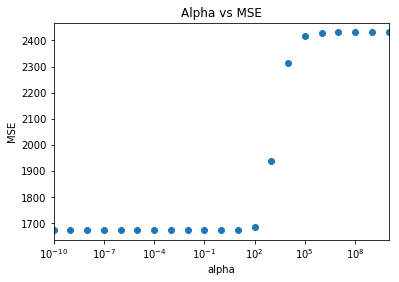

In [12]:
plt.scatter(x=alphas,y=results)
plt.xlim(10**(-10),10**10)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Alpha vs MSE')

In [31]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
inter = [True,False]
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error') #mean_squared_error

gs.fit(modeldata, y)

print(-gs.best_score_) # mean squared error here comes in negative, so let's make it positive.
print(gs.best_estimator_) # explains which grid_search setup worked best
print(gs.grid_scores_) # shows all the grid pairings and their performances.

1814.0936913337962
Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
[mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-10}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1.0000000000000001e-09}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-07}, mean: -1817.58711, std: 542.14317, params: {'alpha': 1.0000000000000001e-05}, mean: -1817.58707, std: 542.14331, params: {'alpha': 0.0001}, mean: -1817.58663, std: 542.14477, params: {'alpha': 0.001}, mean: -1817.58230, std: 542.15933, params: {'alpha': 0.01}, mean: -1817.54318, std: 542.30102, params: {'alpha': 0.10000000000000001}, mean: -1817.20111, std: 543.63587, params: {'alpha': 1.0}, mean: -1814.09369, std: 556.35563, params: {'alpha': 10.0}, mean: -1818.51694, std: 653.68607, par

In [27]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error', cv=10)#mean_squared_error

gs.fit(modeldata, y)

print(-gs.best_score_) # mean squared error here comes in negative, so let's make it positive.
print(gs.best_estimator_) # explains which grid_search setup worked best
print(gs.grid_scores_) # shows all the grid pairings and their performances.

C:\Users\Ayham\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


1742.3475983361245
Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
[mean: -1743.92970, std: 1051.57802, params: {'alpha': 1e-10}, mean: -1743.92970, std: 1051.57802, params: {'alpha': 1.0000000000000001e-09}, mean: -1743.92970, std: 1051.57802, params: {'alpha': 1e-08}, mean: -1743.92970, std: 1051.57802, params: {'alpha': 9.9999999999999995e-08}, mean: -1743.92970, std: 1051.57802, params: {'alpha': 9.9999999999999995e-07}, mean: -1743.92970, std: 1051.57802, params: {'alpha': 1.0000000000000001e-05}, mean: -1743.92968, std: 1051.57808, params: {'alpha': 0.0001}, mean: -1743.92951, std: 1051.57864, params: {'alpha': 0.001}, mean: -1743.92784, std: 1051.58418, params: {'alpha': 0.01}, mean: -1743.91380, std: 1051.63647, params: {'alpha': 0.10000000000000001}, mean: -1743.77710, std: 1052.14163, params: {'alpha': 1.0}, mean: -1742.34760, std: 1057.35486, params: {'alpha': 10.0}, mean: -1747.18651, std: 11

In [24]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print(distance, 'is better than', current_distance)
            current_distance = distance
            start = n
    if got_better:
        print('found better solution! using', current_distance)
        a += 1
    else:
        optimized = True
        print(start, 'is closest to', num_to_approach)


5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
1.2 is better than 2.2
found better solution! using 1.2
0.2 is better than 1.2000000000000002
found better solution! using 0.2
6.0 is closest to 6.2


For the DP example below, it might be a great idea for students to take the code and implement a stopping point, similar to what n_iter would do in gradient descent.

There can be a great conversation about stopping early and still _kinda_ getting the right result vs taking a longer time to solve and having a more precise model.

That solution is below.

In [8]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
n_iter = 0
while not optimized:
    if n_iter > 3:
        print('stopping iterations')
        break
    n_iter += 1
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print('found better solution! using', current_distance)
        a += 1
    else:
        optimized = True
        print(start, 'is closest to', num_to_approach)


5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
stopping iterations


In [37]:
lm = linear_model.SGDRegressor()
lm.fit(modeldata, y)
print(lm.score(modeldata, y))
print(metrics.mean_squared_error(y, lm.predict(modeldata)))

0.308412082331
1681.14382069


### Independent Practice Solution

This code shows the variety of challenges and some student gotchas. The plots will help showcase what should be learned.

1. With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
2. We know when to properly use l1 vs l2 regularization based on the data. By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does that statement hold true?
    * (if it didn't look like it, did gradient descent have enough iterations?)
3. How do results change when you alter the learning rate (power_t)?

In [10]:
%matplotlib inline

In [59]:
alphas = np.logspace(-10, -1, 10)
print(alphas)
params = {'alpha':alphas, } # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
#print(grid)
#grid[[0]] = grid.apply(lambda x: x['alpha'])
#grid[[1]] = grid.apply(lambda x: -x)
#
#grid['parameters']
grid['mean_validation_score'] = grid['mean_validation_score'].apply(lambda x: -x)
grid.columns = ['alpha', 'mean_squared_error', 'cv']
grid

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01]


,alpha,mean_squared_error,cv
0,{'alpha': 1e-10},1689.057215,"[-1722.82475232, -1649.73292211, -1753.5620392..."
1,{'alpha': 1e-09},1688.916325,"[-1723.13392866, -1649.86064818, -1752.9752820..."
2,{'alpha': 1e-08},1689.745339,"[-1722.42804638, -1650.79302089, -1756.6115806..."
3,{'alpha': 1e-07},1689.153921,"[-1722.77150125, -1648.05844351, -1757.5580151..."
4,{'alpha': 1e-06},1689.530188,"[-1723.63890271, -1647.07739725, -1752.3407156..."
5,{'alpha': 1e-05},1691.685209,"[-1728.35523281, -1647.27080641, -1756.3393041..."
6,{'alpha': 0.0001},1688.458581,"[-1722.66866633, -1648.90758805, -1753.0146729..."
7,{'alpha': 0.001},1692.610531,"[-1727.22501365, -1649.42345286, -1756.3535838..."
8,{'alpha': 0.01},1728.891642,"[-1758.32762395, -1684.12446372, -1798.1392074..."
9,{'alpha': 0.1},2053.534643,"[-2069.59662258, -1992.84048643, -2135.0915413..."


With the alphas available, it looks like at mean squared error stays generally flat with incredibly small alpha values, but starting at $10^{-3}$, the error begins to elbow. We probably don't have much of a different in performance with other alpha values. 

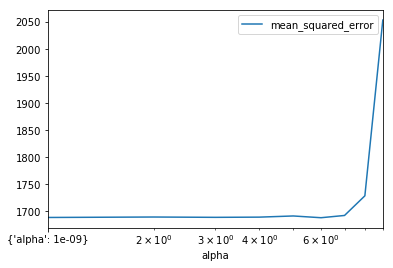

In [60]:
grid.plot('alpha', 'mean_squared_error', logx=True)

At alpha values of either .1 or 1, the l1_ratio works best closer to 1! Interesting. At other values of alpha they should see similar results, though the graphs aren't as clear.

In [28]:
l1_2_ratios = [float(i) / 100 for i in range(0, 101, 5)]
print(l1_2_ratios)
params = {'l1_ratio':l1_2_ratios, 'penalty': ['elasticnet'], 'alpha': [.1], 'n_iter': [50]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
grid['mean_validation_score'] = grid['mean_validation_score'].apply(lambda x: -x)
grid.columns = ['l1_ratio', 'neg_mean_squared_error', 'cv']
grid


[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


,l1_ratio,neg_mean_squared_error,cv
0,"{'alpha': 0.1, 'l1_ratio': 0.0, 'n_iter': 50, ...",2052.655639,"[-2115.46253746, -2015.36095545, -2001.5611164..."
1,"{'alpha': 0.1, 'l1_ratio': 0.05, 'n_iter': 50,...",2042.459913,"[-2103.68561333, -2004.75230514, -1990.2948043..."
2,"{'alpha': 0.1, 'l1_ratio': 0.1, 'n_iter': 50, ...",2032.178034,"[-2098.60663017, -1993.08586818, -1980.0966609..."
3,"{'alpha': 0.1, 'l1_ratio': 0.15, 'n_iter': 50,...",2021.676749,"[-2084.16683211, -1989.44188251, -1968.8268987..."
4,"{'alpha': 0.1, 'l1_ratio': 0.2, 'n_iter': 50, ...",2007.697586,"[-2071.3796204, -1970.42627814, -1954.84992458..."
5,"{'alpha': 0.1, 'l1_ratio': 0.25, 'n_iter': 50,...",1994.653432,"[-2058.95272862, -1955.34829111, -1942.5496973..."
6,"{'alpha': 0.1, 'l1_ratio': 0.3, 'n_iter': 50, ...",1981.797654,"[-2047.22526703, -1943.95956564, -1928.7041239..."
7,"{'alpha': 0.1, 'l1_ratio': 0.35, 'n_iter': 50,...",1966.487216,"[-2029.85629592, -1927.2891704, -1913.46431659..."
8,"{'alpha': 0.1, 'l1_ratio': 0.4, 'n_iter': 50, ...",1950.899715,"[-2017.7177587, -1911.93720681, -1896.39840467..."
9,"{'alpha': 0.1, 'l1_ratio': 0.45, 'n_iter': 50,...",1932.943341,"[-1997.77211252, -1894.19575302, -1878.5173685..."


In [29]:
l1_2_ratios

[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95,
 1.0]

In [68]:
gs.best_estimator_

SGDRegressor(alpha=0.1, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=1.0, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty='elasticnet', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

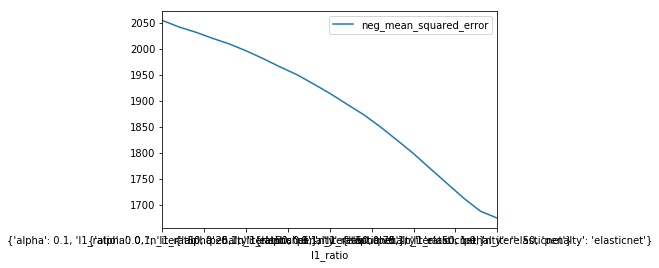

In [69]:
grid.plot('l1_ratio', 'neg_mean_squared_error')

In [79]:
learning = list(range(1,50))
print(learning)
params = {'eta0':list(range(1,50)), 'n_iter': [50]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

grid = pd.DataFrame(gs.grid_scores_)
grid.columns = ['eta0', 'neg_mean_squared_error', 'cv']
grid['neg_mean_squared_error'] = grid['neg_mean_squared_error'].apply(lambda x: -x)
grid

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


,eta0,neg_mean_squared_error,cv
0,"{'eta0': 1, 'n_iter': 50}",1.725037e+03,"[-1789.98544025, -1758.00393447, -1663.9125627..."
1,"{'eta0': 2, 'n_iter': 50}",1.824407e+03,"[-2023.79825994, -1750.50514107, -1975.7765157..."
2,"{'eta0': 3, 'n_iter': 50}",7.423995e+06,"[-1879.59235093, -1790.22937837, -39545.683139..."
3,"{'eta0': 4, 'n_iter': 50}",3.144140e+04,"[-2128.95507261, -1953.45908669, -3226.4256088..."
4,"{'eta0': 5, 'n_iter': 50}",1.965391e+03,"[-2125.97787269, -1793.69474074, -2149.1616581..."
5,"{'eta0': 6, 'n_iter': 50}",2.130519e+03,"[-2991.05398865, -1836.70616578, -1960.3444971..."
6,"{'eta0': 7, 'n_iter': 50}",2.243413e+03,"[-2110.52908341, -1748.97846854, -2124.1322362..."
7,"{'eta0': 8, 'n_iter': 50}",3.375392e+03,"[-2298.81979351, -1838.01928862, -2882.8880178..."
8,"{'eta0': 9, 'n_iter': 50}",2.365678e+03,"[-2266.32281452, -2744.88567892, -1889.1472029..."
9,"{'eta0': 10, 'n_iter': 50}",3.732016e+03,"[-2434.43884628, -2239.65576883, -5755.9066568..."


Here it should be apparent that as the initial learning rate increases, the error should _also_ increase. And what happens when the initial learning rate is too high? A dramatic increase in error. Students should recognize the importance of learning rate and what values it should be set at, the smaller generally the better.

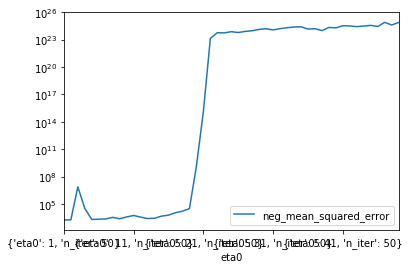

In [81]:
grid.plot('eta0', 'neg_mean_squared_error', logy=True)